学习R语言功效分析。

# t检验

In [1]:
library(pwr)
pwr.t.test(
  d=0.8,
  sig.level=0.05,
  power=0.9,
  type="two.sample",
  alternative="two.sided"
)


     Two-sample t test power calculation 

              n = 33.82555
              d = 0.8
      sig.level = 0.05
          power = 0.9
    alternative = two.sided

NOTE: n is number in *each* group


In [3]:
pwr.t.test(
  n=20,
  d=0.5,
  sig.level=0.01,
  type="two.sample",
  alternative="two.sided"
)


     Two-sample t test power calculation 

              n = 20
              d = 0.5
      sig.level = 0.01
          power = 0.1439551
    alternative = two.sided

NOTE: n is number in *each* group


# 方差分析

In [4]:
pwr.anova.test(
  k=5,
  f=.25,
  sig.level=.05,
  power=.8
)


     Balanced one-way analysis of variance power calculation 

              k = 5
              n = 39.1534
              f = 0.25
      sig.level = 0.05
          power = 0.8

NOTE: n is number in each group


# 相关性

In [5]:
pwr.r.test(
  r=0.25,
  sig.level=0.05,
  power=0.9,
  alternative = "greater"
)


     approximate correlation power calculation (arctangh transformation) 

              n = 133.2803
              r = 0.25
      sig.level = 0.05
          power = 0.9
    alternative = greater


# 线性模型

In [6]:
pwr.f2.test(
  u=3,
  f2=0.0769,
  sig.level=.05,
  power=0.90
)


     Multiple regression power calculation 

              u = 3
              v = 184.2426
             f2 = 0.0769
      sig.level = 0.05
          power = 0.9


# 比例检验

In [7]:
pwr.2p.test(
  h=ES.h(.65, .6),
  sig.level=.05,
  power=.9,
  alternative="greater"
)


     Difference of proportion power calculation for binomial distribution (arcsine transformation) 

              h = 0.1033347
              n = 1604.007
      sig.level = 0.05
          power = 0.9
    alternative = greater

NOTE: same sample sizes


# $\chi^2$检验

In [8]:
prob <- matrix(
  c(.42, .28, .03, .07, .10, .10),
  byrow=TRUE,
  nrow=3
)
ES.w2(prob)

[1] 0.1853198

In [9]:
pwr.chisq.test(
  w=ES.w2(prob),
  df=2,
  sig.level=.05,
  power=.9
)


     Chi squared power calculation 

              w = 0.1853198
              N = 368.4528
             df = 2
      sig.level = 0.05
          power = 0.9

NOTE: N is the number of observations


# 探索效应值

[1] "numeric"


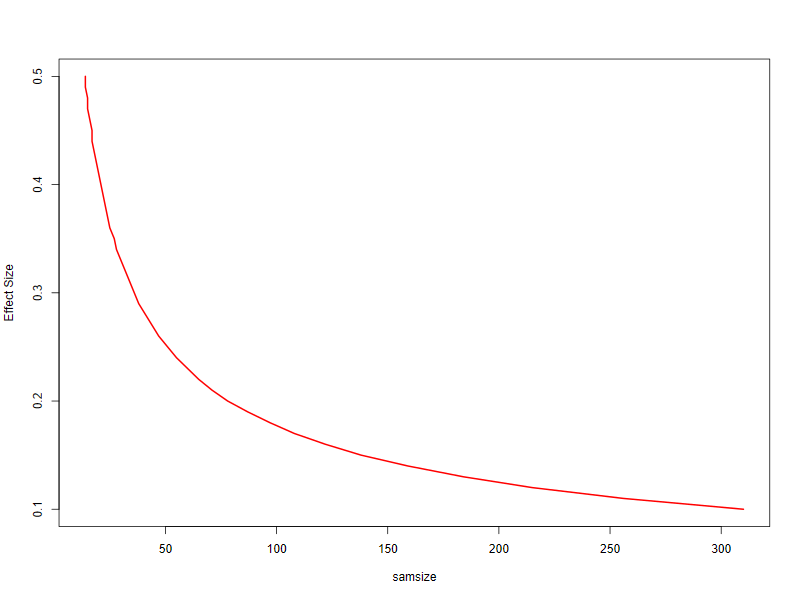

In [12]:
library(pwr)

es <- seq(.1, .5, .01)
nes <- length(es)
samsize <- NULL

for (i in 1:nes){
  result <- pwr.anova.test(
    k=5,
    f=es[i],
    sig.level=.05,
    power=.9
  )
  samsize[i] <- ceiling(result$n)
}
plot(samsize, es, type="l", lwd=2, col="red", ylab="Effect Size")

# 绘制功效分析图形

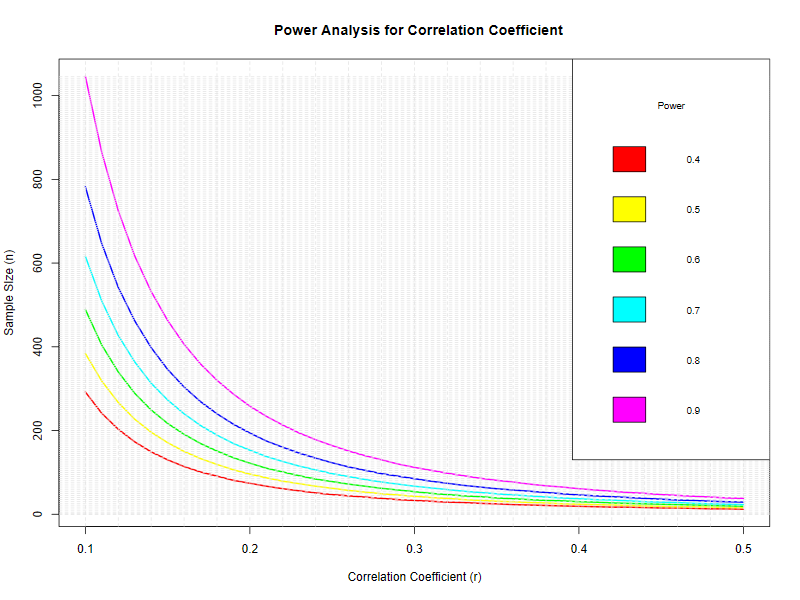

In [32]:
library(pwr)

# 生成一系列相关系数和功效值
r <- seq(.1, .5, .01)
nr <- length(r)

p <- seq(.4, .9, .1)
np <- length(p)

# 获取样本大小
samsize <- array(numeric(nr*np), dim=c(nr, np))
for (i in 1:np){
  for (j in 1:nr){
    result <- pwr.r.test(
      r=r[j],
      sig.level=.05,
      power=p[i],
      alternative="two.sided",
    )

    samsize[j, i] <- ceiling(result$n)
  }
}

# 创建图形
xrange <- range(r)
yrange <- round(range(samsize))
colors <- rainbow(length(p))
plot(
  xrange,
  yrange,
  type="n",
  xlab="Correlation Coefficient (r)",
  ylab="Sample SIze (n)"
)

# 添加功效曲线
for (i in 1:np){
  lines(
    r,
    samsize[, i],
    type="l",
    lwd=2,
    col=colors[i]
  )
}

# 添加网格线
abline(
  v=0,
  h=seq(0, yrange[2], 5),
  lty=2,
  col="grey89"
)
abline(
  h=1,
  v=seq(xrange[1], xrange[2], .02),
  lty=2,
  col="gray89"
)

# 添加注释
title("
  Power Analysis for Correlation Coefficient
")

legend(
  "topright",
  title="Power",
  as.character(p),
  fill=colors,
  cex=.8
)